## Lab  - Linear regression

In this lab, you need to work with Students data and grades as labels for Portugese students.
Your task is to fit a Linear model, and predict the grades (G3) based on suitable input variables.
You are required to do the data manipulation (converting text to numeric), train-test splits etc to create the model.

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv

Description is available here : https://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [1]:
# Import the library
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection


students_por_url = "https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv"
students = pd.read_csv(students_por_url,sep=';')
students.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


In [2]:
# list of all categorical variables
categorical_list = ["sex", 
                    "address",
                    "famsize",
                    "Pstatus", 
                    "Medu", 
                    "Fedu", 
                    "Mjob", 
                    "Fjob", 
                    "reason", 
                    "guardian", 
                    "schoolsup", 
                    "famsup", 
                    "paid", 
                    "activities", 
                    "nursery", 
                    "higher",
                    "internet", 
                    "romantic",
                    "famrel",
                    "freetime", 
                    "goout",
                    "Dalc",
                    "Walc",
                    "health", 
                    "traveltime",
                    "school"
                   ]

In [3]:
## Let us first get dummy indices for categorical variables
students_encoded = pd.get_dummies(students, columns=categorical_list)

In [4]:
from sklearn import linear_model, metrics, model_selection 

# getting the datset ready 
y = students_encoded['G3']
X = students_encoded.drop(columns=["G3"])

# perform test train split 
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,y, train_size=0.80, random_state=0, shuffle=True)

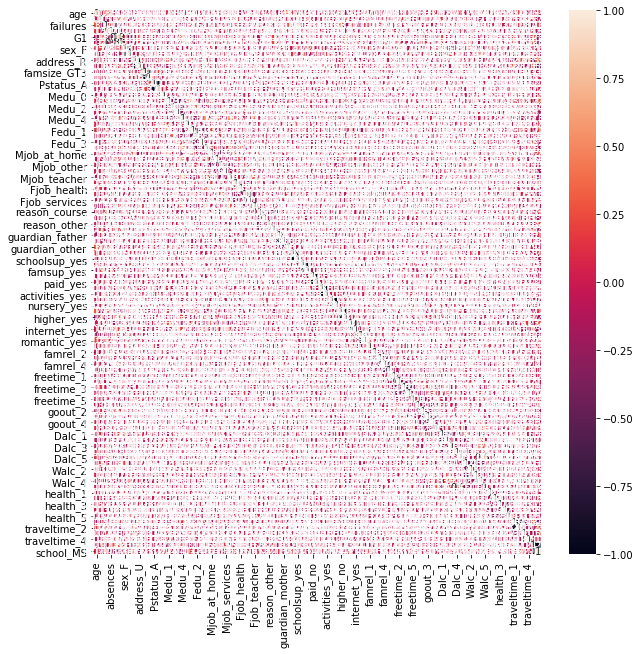

In [5]:
corr_matrix = train_x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
new_corr = corr_matrix.reset_index()
corr_pairs = pd.melt(new_corr, id_vars=["index"])
high_corr_features = corr_pairs[corr_pairs["value"].between(0.6, 0.999)] 

In [8]:
lr = linear_model.LinearRegression()


In [19]:
lr.fit(train_x, train_y)
preds = lr.predict(test_x)
metrics.mean_squared_error(preds,test_y)

1.1250848344885387

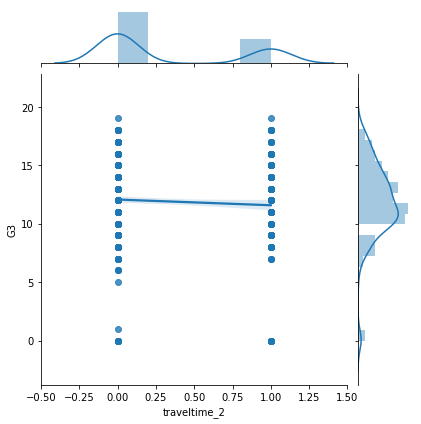